# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

<!-- 1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png) -->

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install folium==0.2.1

In [2]:
!pip install "mxnet<2.0.0, >=1.7.0"
!pip3 install torch==1.12.0+cu113 torchvision==0.13.0+cu113 torchtext==0.13.0 --extra-index-url https://download.pytorch.org/whl/cu113
!pip3 install -U setuptools wheel
!pip install autogluon

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.2 MB 56.1 MB/s 
     |████████████████████████████████| 4.4 MB 44.7 MB/s 
     |████████████████████████████████| 585 kB 75.8 MB/s 
     |████████████████████████████████| 109 kB 77.0 MB/s 
     |████████████████████████████████| 166.7 MB 18 kB/s 
     |████████████████████████████████| 2.0 MB 53.0 MB/s 
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
     |████████████████████████████████| 157 kB 76.4 MB/s 
     |████████████████████████████████| 6.6 MB 50.6 MB/s 
     |████████████████████████████████| 64 kB 3.5 MB/s 
     |████████████████████████████████| 116 kB 76.5 MB/s 
     |████████████████████████████████| 880 kB 64.6 MB/s 
     |████████████████████████████████| 1.2 MB 56.8 MB/s 
     |████████████████████████████████| 296 kB 67.9 MB/s 
     |███████████████

In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 6.8 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 32.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080019 sha256=172bc580cf29eed73bc771686205dd1d0f13aa8ca2e4ff491d18ba1ee7f5bf15
  Stored in directory: /root/.cache/pip/wheels/9f/9e/ac/f24f30e119df73511fde9af8aa747217ac8824e662037ba9a8
Successfully built bokeh
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.3.3
    Uninstalling bokeh-2.3

### Setup Kaggle API Key

In [4]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "omarhamedmarie"
kaggle_key = "24fe88a74aa98167679291965dd3b2b0"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

<!-- ### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
![kaggle6.png](attachment:kaggle6.png) -->

In [6]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 49.8MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [8]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [9]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv", parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [11]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv", parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [12]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv", parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [13]:
predictor = TabularPredictor(label='count', eval_metric = 'root_mean_squared_error')\
.fit(train.loc[:, ~train.columns.isin(['casual', 'registered'])],
     time_limit=600,
     presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20220728_135658/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220728_135658/"
AutoGluon Version:  0.5.1
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator..

### Review AutoGluon's training run with ranking of models that did the best.

In [14]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.465583      10.655392  446.452421                0.000617           0.311584            3       True         16
1   RandomForestMSE_BAG_L2  -53.447512       9.722387  406.300509                0.588727          25.860781            2       True         12
2     ExtraTreesMSE_BAG_L2  -53.959701       9.705634  388.166159                0.571974           7.726431            2       True         14
3          LightGBM_BAG_L2  -55.241593       9.311689  398.564447                0.178030          18.124719            2       True         11
4          CatBoost_BAG_L2  -55.594984       9.200476  448.402491                0.066816          67.962763            2       True         13
5   NeuralNetFastAI_BAG_L2  -55.762089       9.494073  412.553625         

{'leaderboard':                      model   score_val  pred_time_val    fit_time  \
 0      WeightedEnsemble_L3  -52.465583      10.655392  446.452421   
 1   RandomForestMSE_BAG_L2  -53.447512       9.722387  406.300509   
 2     ExtraTreesMSE_BAG_L2  -53.959701       9.705634  388.166159   
 3          LightGBM_BAG_L2  -55.241593       9.311689  398.564447   
 4          CatBoost_BAG_L2  -55.594984       9.200476  448.402491   
 5   NeuralNetFastAI_BAG_L2  -55.762089       9.494073  412.553625   
 6        LightGBMXT_BAG_L2  -60.497315      11.861105  424.321731   
 7    KNeighborsDist_BAG_L1  -84.125061       0.104927    0.046962   
 8      WeightedEnsemble_L2  -84.125061       0.105930    0.705213   
 9    KNeighborsUnif_BAG_L1 -101.546199       0.103391    0.033428   
 10  RandomForestMSE_BAG_L1 -116.544294       0.528598   12.302773   
 11    ExtraTreesMSE_BAG_L1 -124.588053       0.494705    4.525959   
 12         CatBoost_BAG_L1 -130.482675       0.190197  197.887032   
 13  

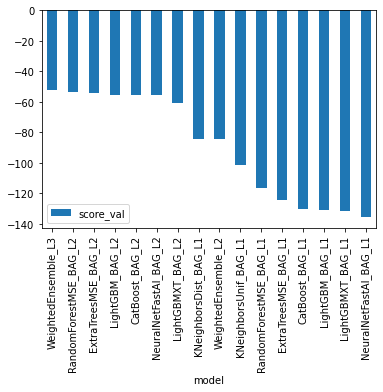

In [15]:
predictor.leaderboard(silent = True).plot(kind = 'bar' , x = 'model' , y='score_val')

### Create predictions from test dataset

In [16]:
predictions = predictor.predict(test)
predictions.head()

0    26.186039
1    42.599724
2    46.507046
3    49.842670
4    52.548645
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [17]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      102.384338
std        88.571342
min         0.351115
25%        25.827343
50%        68.741364
75%       171.326904
max       360.786346
Name: count, dtype: float64

In [18]:
# How many negative values do we have?
sum(predictions < 0)

0

In [19]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [20]:
submission["count"] = predictions[:]
submission.to_csv("submission.csv", index=False)

In [21]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:03<00:00, 50.9kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [22]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2022-07-28 14:07:40  first raw submission               pending                              
submission_new_hpo.csv       2022-07-27 18:57:49  new features with hyperparameters  complete  0.70409      0.70409       
submission_new_hpo.csv       2022-07-27 18:56:58  new features with hyperparameters  error                                
submission_new_features.csv  2022-07-27 18:45:44  new features                       complete  0.68311      0.68311       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4f7256110>,
      dtype=object)

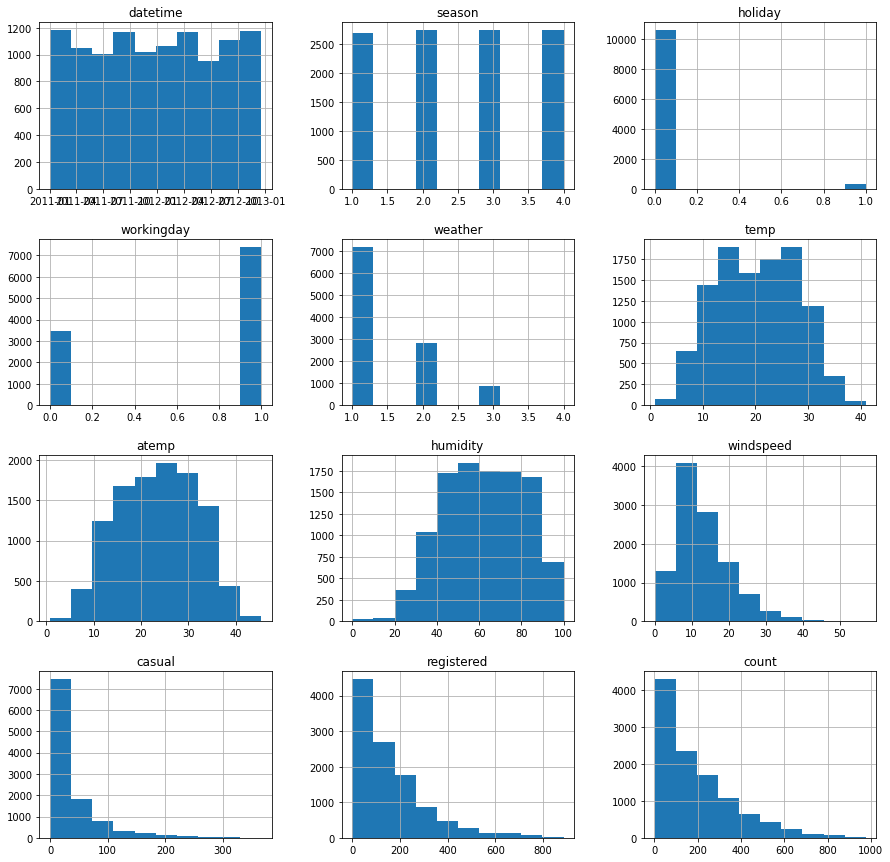

In [23]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15,15))

In [24]:
# create a new feature
train['hour'] = train['datetime'].dt.hour
train['day']  = train['datetime'].dt.day

test['hour'] = test['datetime'].dt.hour
test['day']  = test['datetime'].dt.day

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  hour        10886 non-null  int64         
 13  day         10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(10)
memory usage: 1.2 MB


In [26]:
train["season"]  = train['season'].astype('category')
train["weather"] = train['weather'].astype('category')

test["season"]   = test['season'].astype('category')
test["weather"]  = test['weather'].astype('category')

In [27]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4f5b48110>,
      dtype=object)

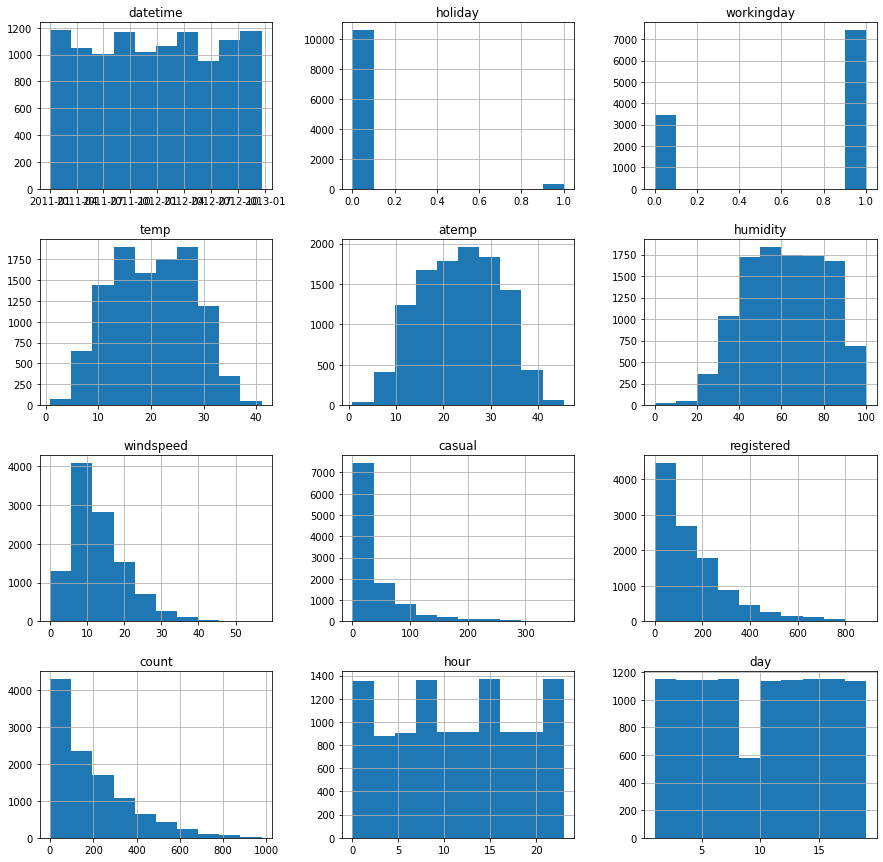

In [28]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15,15))

## Step 5: Rerun the model with the same settings as before, just with more features

In [29]:
predictor_new_features = TabularPredictor(label='count', eval_metric = 'root_mean_squared_error')\
.fit(train.loc[:, ~train.columns.isin(['casual', 'registered'])],
     time_limit=600,
     presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20220728_140745/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220728_140745/"
AutoGluon Version:  0.5.1
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator.

In [30]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.278389      14.703989  552.071463                0.000915           0.608786            3       True         16
1          CatBoost_BAG_L2  -30.529871      13.353302  489.012856                0.126387          93.284555            2       True         13
2          LightGBM_BAG_L2  -30.659094      13.485939  415.057095                0.259024          19.328794            2       True         11
3        LightGBMXT_BAG_L2  -31.314156      13.930336  418.773539                0.703421          23.045238            2       True         10
4     ExtraTreesMSE_BAG_L2  -31.583319      13.817023  404.327762                0.590108           8.599461            2       True         14
5   RandomForestMSE_BAG_L2  -31.746741      13.830118  425.016309         

{'leaderboard':                      model   score_val  pred_time_val    fit_time  \
 0      WeightedEnsemble_L3  -30.278389      14.703989  552.071463   
 1          CatBoost_BAG_L2  -30.529871      13.353302  489.012856   
 2          LightGBM_BAG_L2  -30.659094      13.485939  415.057095   
 3        LightGBMXT_BAG_L2  -31.314156      13.930336  418.773539   
 4     ExtraTreesMSE_BAG_L2  -31.583319      13.817023  404.327762   
 5   RandomForestMSE_BAG_L2  -31.746741      13.830118  425.016309   
 6      WeightedEnsemble_L2  -32.112280      12.246702  347.516391   
 7          CatBoost_BAG_L1  -33.789541       0.227315  220.121721   
 8          LightGBM_BAG_L1  -33.919395       2.489129   33.804312   
 9        LightGBMXT_BAG_L1  -34.485240       8.869263   80.497151   
 10    ExtraTreesMSE_BAG_L1  -38.340088       0.527219    5.357152   
 11  RandomForestMSE_BAG_L1  -38.370938       0.556627   12.628247   
 12  NeuralNetFastAI_BAG_L2  -42.185648      13.614241  415.804091   
 13  

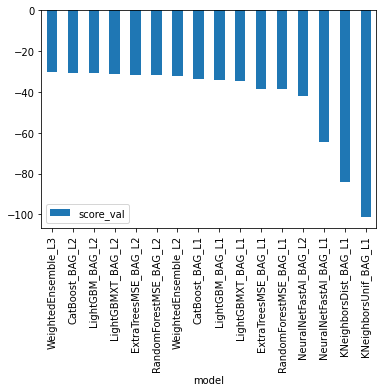

In [31]:
predictor_new_features.leaderboard(silent = True).plot(kind = 'bar' , x = 'model' , y='score_val')

In [32]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    15.766075
1    11.308271
2    10.646024
3     9.297762
4     8.019485
Name: count, dtype: float32

In [33]:
sum(predictions_new_features < 0)

0

In [34]:
# Remember to set all negative values to zero
predictions_new_features[predictions_new_features < 0] = 0

In [35]:
# Same submitting predictions
submission_new_features = pd.read_csv('./sampleSubmission.csv', parse_dates=["datetime"])
submission_new_features["count"] = predictions_new_features[:]
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [36]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:01<00:00, 98.6kB/s]
Successfully submitted to Bike Sharing Demand

In [37]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2022-07-28 14:18:43  new features                       pending                              
submission.csv               2022-07-28 14:07:40  first raw submission               complete  1.74396      1.74396       
submission_new_hpo.csv       2022-07-27 18:57:49  new features with hyperparameters  complete  0.70409      0.70409       
submission_new_hpo.csv       2022-07-27 18:56:58  new features with hyperparameters  error                                


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [38]:
predictor_new_hpo = TabularPredictor(label='count',
                                     problem_type="regression",
                                     eval_metric = 'root_mean_squared_error')\
.fit(train.loc[:, ~train.columns.isin(['casual', 'registered'])],
     time_limit=600,
     presets='best_quality',
     num_bag_folds=5,
     num_bag_sets=10,
     num_stack_levels=2,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220728_141845/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=5, num_bag_sets=10
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220728_141845/"
AutoGluon Version:  0.5.1
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11339.75 MB
	Train Data (Original)  Memory Usage: 0.81 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	St

In [39]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -29.350730      13.317554  401.283062                0.000715           0.375762            3       True         17
1      WeightedEnsemble_L4  -29.581240      17.442874  545.817640                0.000948           0.336829            4       True         24
2   NeuralNetFastAI_BAG_L2  -29.701813      12.997322  307.174154                0.327468          49.339481            2       True         15
3          CatBoost_BAG_L3  -29.873686      16.405179  489.668313                0.057587          24.404002            3       True         21
4          LightGBM_BAG_L3  -30.035948      16.432680  475.617907                0.085089          10.353595            3       True         19
5     ExtraTreesMSE_BAG_L3  -30.061317      16.941023  473.695324         

{'leaderboard':                      model   score_val  pred_time_val    fit_time  \
 0      WeightedEnsemble_L3  -29.350730      13.317554  401.283062   
 1      WeightedEnsemble_L4  -29.581240      17.442874  545.817640   
 2   NeuralNetFastAI_BAG_L2  -29.701813      12.997322  307.174154   
 3          CatBoost_BAG_L3  -29.873686      16.405179  489.668313   
 4          LightGBM_BAG_L3  -30.035948      16.432680  475.617907   
 5     ExtraTreesMSE_BAG_L3  -30.061317      16.941023  473.695324   
 6   RandomForestMSE_BAG_L3  -30.106704      16.968802  494.546611   
 7          CatBoost_BAG_L2  -30.274091      12.747706  339.982612   
 8          LightGBM_BAG_L2  -30.334517      12.911519  269.419880   
 9           XGBoost_BAG_L2  -30.919199      13.740812  270.528604   
 10       LightGBMXT_BAG_L2  -31.201414      13.397274  271.208428   
 11    ExtraTreesMSE_BAG_L2  -31.231177      13.288651  266.463282   
 12       LightGBMXT_BAG_L3  -31.325713      16.514508  475.874664   
 13  

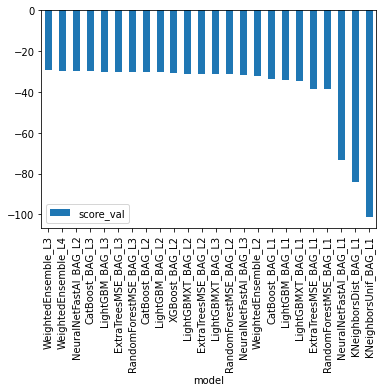

In [40]:
predictor_new_hpo.leaderboard(silent = True).plot(kind = 'bar' , x = 'model' , y='score_val')

In [41]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    16.502348
1    12.719292
2    12.312876
3    11.814534
4    11.271656
Name: count, dtype: float32

In [42]:
# Remember to set all negative values to zero
sum(predictions_new_hpo < 0)

1

In [43]:
predictions_new_hpo[predictions_new_hpo < 0] = 0

In [44]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('./sampleSubmission.csv', parse_dates=["datetime"])
submission_new_hpo["count"] = predictions_new_hpo[:]
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [45]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:02<00:00, 68.8kB/s]
Successfully submitted to Bike Sharing Demand

In [46]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-07-28 14:29:22  new features with hyperparameters  complete  0.74530      0.74530       
submission_new_features.csv  2022-07-28 14:18:43  new features                       complete  0.70253      0.70253       
submission.csv               2022-07-28 14:07:40  first raw submission               complete  1.74396      1.74396       
submission_new_hpo.csv       2022-07-27 18:57:49  new features with hyperparameters  complete  0.70409      0.70409       


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

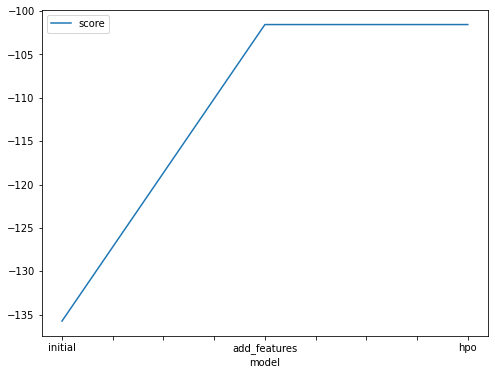

In [50]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
import pandas as pd
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-135.754478, -101.546199, -101.546199]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

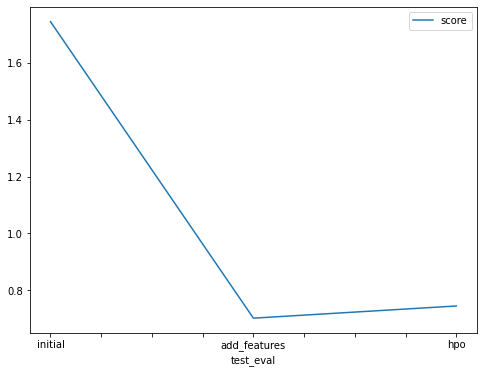

In [52]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.74396, 0.70253, 0.74530]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [53]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model"           : ["initial", "add_features", "hpo"],
    "num_bag_folds"   : [0        ,0              , 5],
    "num_stack_levels": [0        ,0              , 2],
    "num_bag_sets"    : [0        ,0              , 10],
    "score"           : [1.74396  ,0.70253        , 0.74530]
})

,model,num_bag_folds,num_stack_levels,num_bag_sets,score
0,initial,0,0,0,1.74396
1,add_features,0,0,0,0.70253
2,hpo,5,2,10,0.74530
